# Meeting Summary workspace

### Key Imports

In [2]:
#Run the script to parse the meeting and create the DB.

%run sumeeting.py

[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Successfully Connected to SQLite
SQLite script executed successfully
Line: 1388
Line: 1386
Line: 1384
Line: 1383
Line: 1382
Line: 1381
Line: 1380
Line: 1378
Line: 1376
Line: 1374
Line: 1372
Line: 1370
Line: 1368
Line: 1366
Line: 1364
Line: 1362
Line: 1360
Line: 1358
Line: 1356
Line: 1354
Line: 1352
Line: 1350
Line: 1348
Line: 1346
Line: 1344
Line: 1342
Line: 1340
Line: 1338
Line: 1336
Line: 1334
Line: 1332
Line: 1330
Line: 1328
Line: 1326
Line: 1324
Line: 1322
Line: 1320
Line: 1318
Line: 1316
Line: 1314
Line: 1312
Line: 1310
Line: 1308
Line: 1306
Line: 1304
Line: 1302
Line: 1300
Line: 1298
Line: 1296
Line: 1294
Line: 1292
Line: 1290
Line: 1288
Line: 1286
Line: 1284
Line: 1282
Line: 1280
Line: 1278
Line: 1276
Line: 1274
Line: 1272
Line: 1270
Line: 1268
Line: 1266
Line: 1264
Line: 1262
Line: 1260
Line: 1258
Line: 1256
Line: 1254
Line: 1252
Line: 1250
Line: 1249
Line: 1248
Line: 1246
Line: 1244
Line: 1242
Line: 1240
Line: 1238
Line: 1236
Line: 1234
Line: 1232
Line: 1230
Line: 1228
Line: 1

# Meeting Sentiment Timeline

In [1]:
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
plt.style.use('seaborn')

C:\Users\mabrigg\AppData\Local\Temp\ipykernel_25012\726030273.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


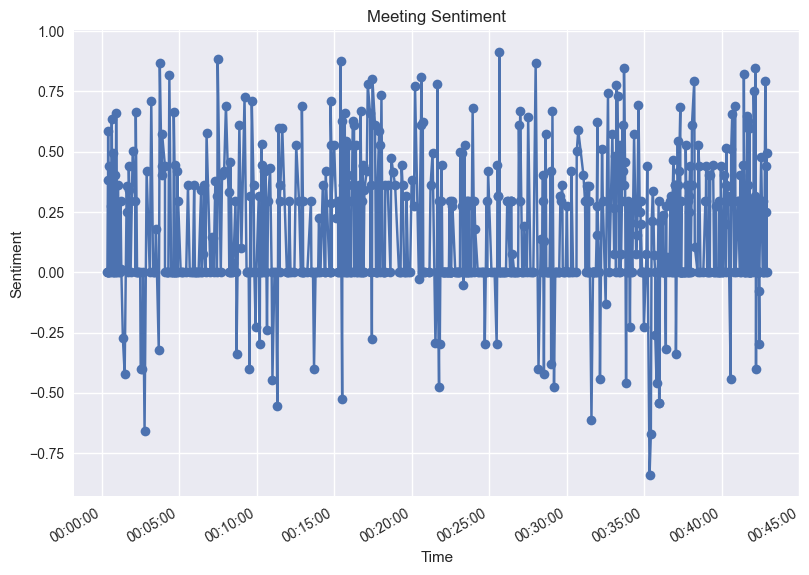

In [4]:
database = "wordsample/summary.db"
conn = sqlite3.connect(database)
data = pd.read_sql("SELECT * from line", con=conn)
conn.close()

data['Time'] = pd.to_datetime(data['TStamp'])
data.sort_values('Time', inplace=True)
sent_time = data['Time']
sent = data['Sentiment']
plt.plot_date(sent_time, sent, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Meeting Sentiment')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

In [12]:
conn = sqlite3.connect(database)
cur = conn.cursor()
top_keywords = list(cur.execute('Select Entity, Score FROM Ranks ORDER BY Score Desc LIMIT 20;'))
cur.close()
conn.close()

liststring = "**top keywords**:  "
no = len(top_keywords)
for indx, i in enumerate(top_keywords):
    if indx+1 < no:
        liststring += "{} ({}), ".format(i[0], i[1])
    else:
        liststring += "{} ({})\n".format(i[0], i[1])

print(liststring)


**top keywords**:  design pattern (12), pattern library (10), architecture center (9), content set (4), content strategy (4), platform team (4), architecture content (3), browse ui (3), markdown file (3), pattern definition (3), product documentation (3), solution template (3), word doc (3), bye bye (2), dev op (2), doc set (2), guide construct (2), life cycle (2), pattern language (2), planning doc (2)

